# Task 3 : Decision Tree Classification on Bank Marketing Dataset

# Problem Statement

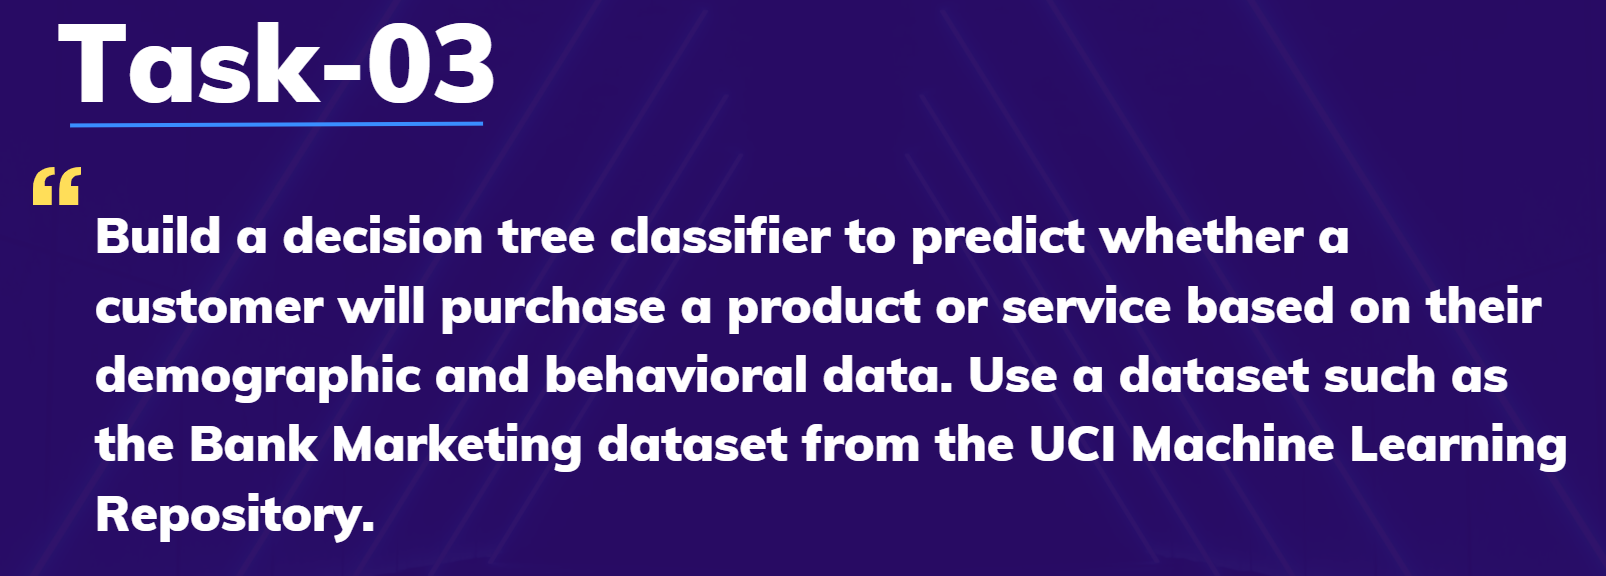

## About the Dataset :

The Dataset we are going to use in this task is Bank Marketing Dataset which is taken from UCI Machine Learning Repository.The dataset here is the 10% sample of the Original Bank Marketing Dataset. The dataset contains 20 features and 1 label. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Features of the Dataset:

### Input variables:
   ## bank client data:
   1.  age (numeric)
   2.  job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
   3.  marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
   4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
   5.  default: has credit in default? (categorical: 'no','yes','unknown')
   6.  housing: has housing loan? (categorical: 'no','yes','unknown')
   7.  loan: has personal loan? (categorical: 'no','yes','unknown')
   ## related with the last contact of the current campaign:
   8.  contact: contact communication type (categorical: 'cellular','telephone')
   9.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
   10.  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
   11.  duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   ## other attributes:
   12.  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13.  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14.  previous: number of contacts performed before this campaign and for this client (numeric)
   15.  poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
   ## social and economic context attributes
   16.  emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17.  cons.price.idx: consumer price index - monthly indicator (numeric)     
   18.  cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
   19.  euribor3m: euribor 3 month rate - daily indicator (numeric)
   20.  nr.employed: number of employees - quarterly indicator (numeric)

   ## Output variable (desired target):
   21.  y - has the client subscribed a term deposit? (binary: 'yes','no')

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
data = pd.read_csv("D:/prodigy/PRODIGY_DS-TASK_3/bank-additional.csv", delimiter=";")
data.rename(columns={'y':'deposit'}, inplace=True)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [9]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


# Basic Understanding of the Dataset

In [11]:
data.shape

(4119, 21)

### The dataset contains 4119 rows and 21 columns

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [420]:
# checking for data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [13]:
data.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

From the above information we can conclude that -
1. The dataset has 21 columns and 4119 rows.
2. The dataset has 11 categorical columns
3. The dataset has 10 numerical columns
4. the dataset has no null values

# Data Cleaning and Data Preprocessing

## Handling Duplicated Values

In [15]:
data.duplicated().sum()

0

## Handling Null Values

In [16]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

There is no null values in the dataset

##  Extracting Numerical and Categorical Columns

In [17]:
cat_cols = data.select_dtypes(include='object').columns
print(cat_cols)

num_cols = data.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


## Descriptive Statistical Analysis

In [18]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


# Data Visualization

## Visualizing Numerical columns using Histplot

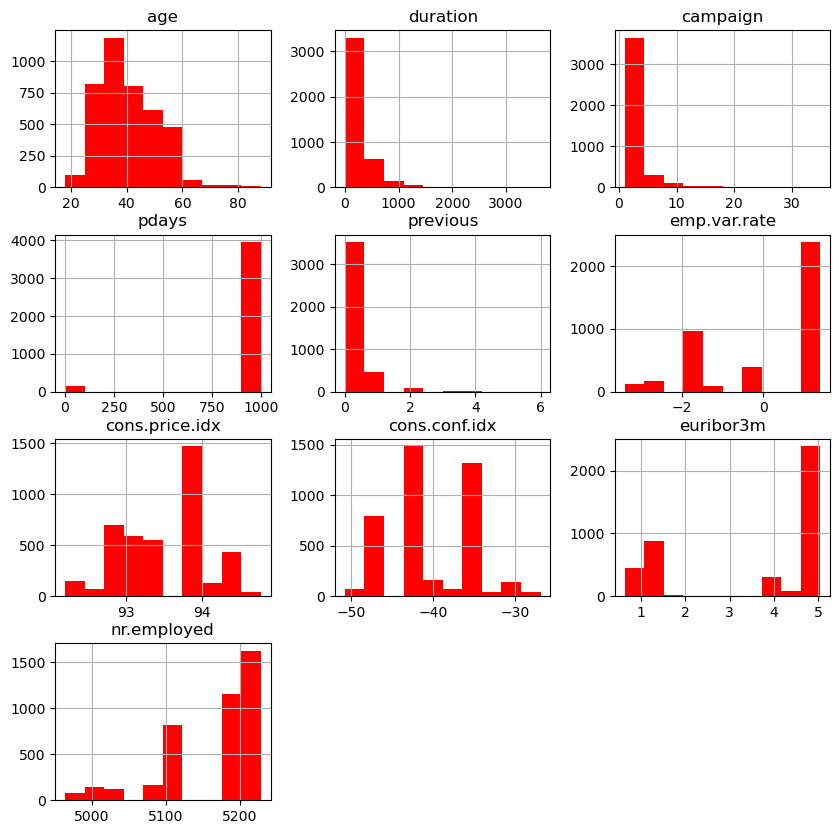

In [20]:
data.hist(figsize=(10,10),color='red')
plt.show()

## Visualizing Categorical columns using Barplot

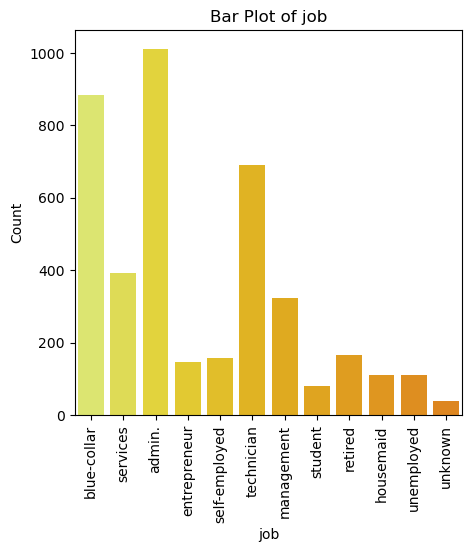

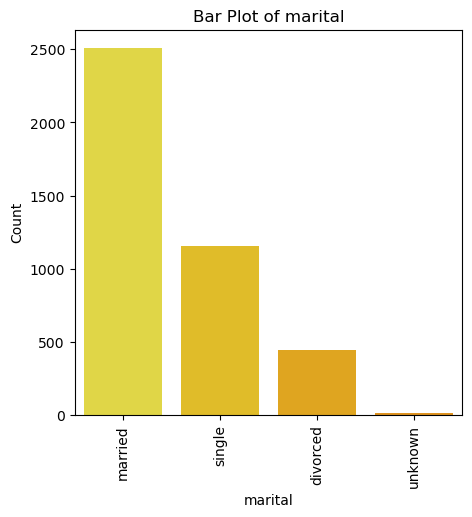

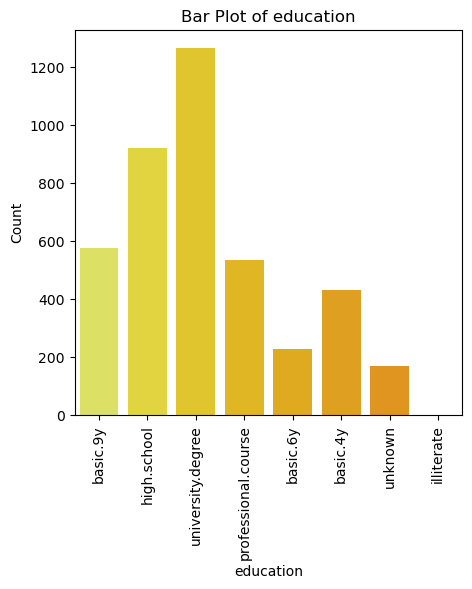

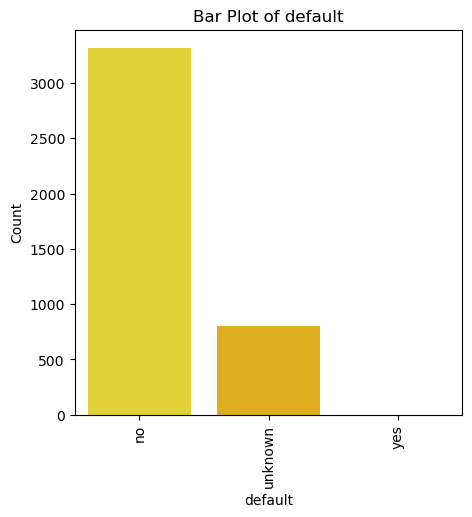

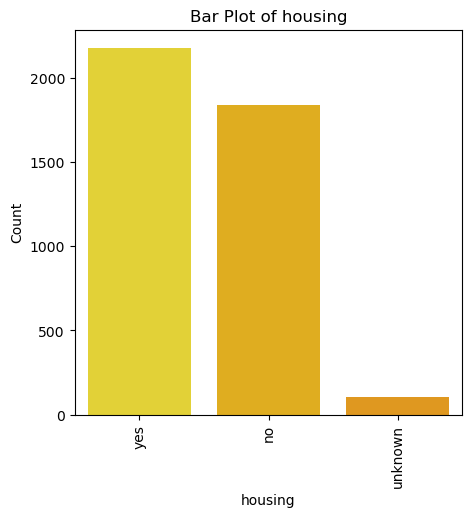

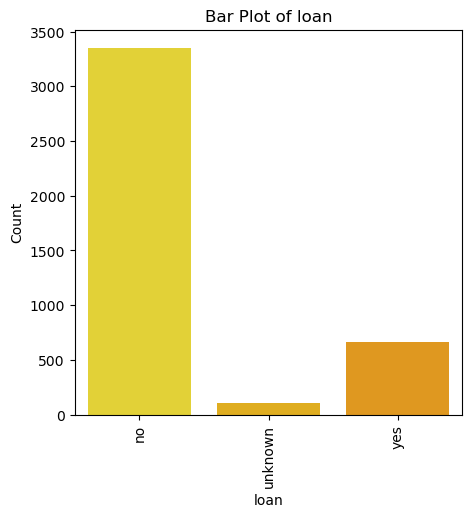

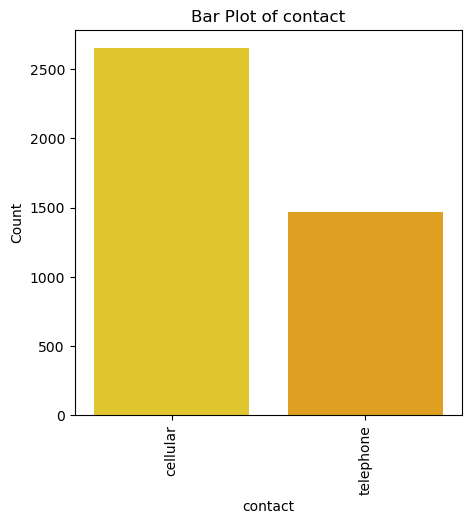

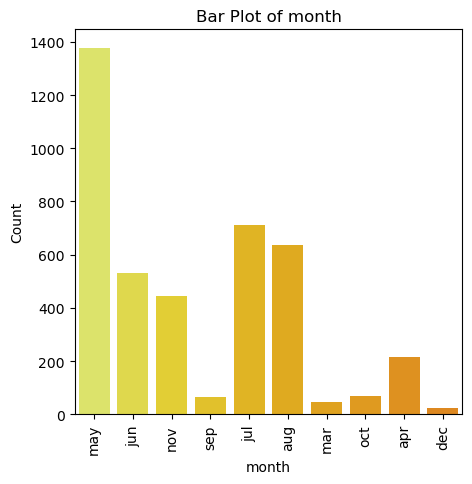

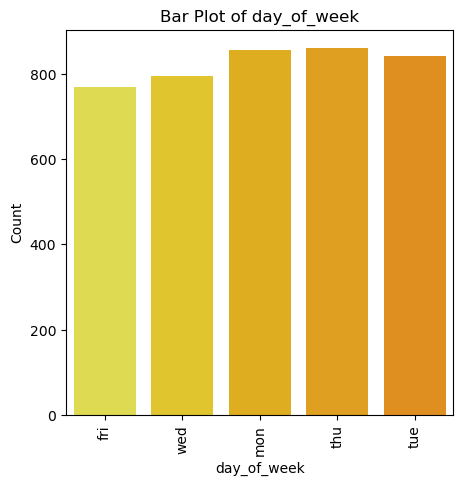

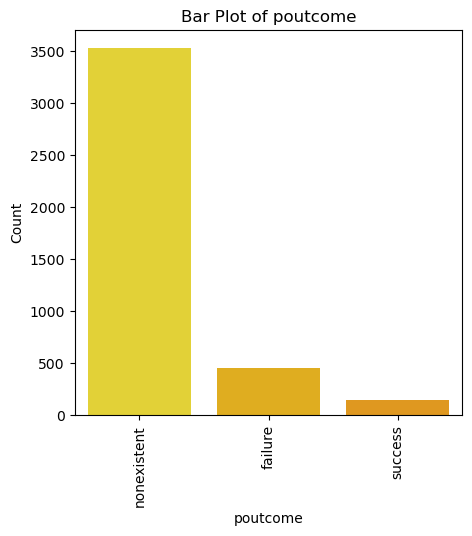

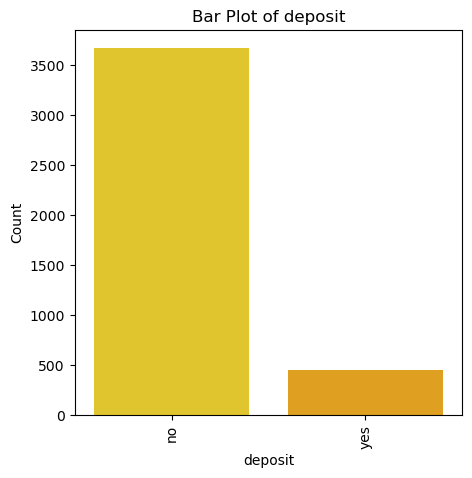

In [21]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature, data=data, palette='Wistia')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

### Insights:

1. In the Job Column, we have seen most of the clients are working as 'admin'.
2. In the marital Column, we have seen most of the clients are married.
3. In the education Column, we have seen most of the clients are having 'university.degree' as education.
4. In the default Column, we have seen most of the clients are having 'no' credit as default.
5. In the housing Column, we have seen most of the clients are taking housing loan.
6. In the loan Column, we have seen most of the clients are not taking personal loan.
7. In the contact Column, we have seen most of the clients are choosen cellular as contact.
8. In the month Column, we have seen most of the clients are contacted in the 'may' month.
9. In the day_of_week Column, we have seen most of the clients are contacted in  'thursday'.
10. In the poutcome Column, we have seen the result of most of the previous market campaign is 'nonexistent'.
11. In the target column , we have seen most of the clients are not subscribed a term deposit.

# Plotting BoxPlot and Checking for Outliers

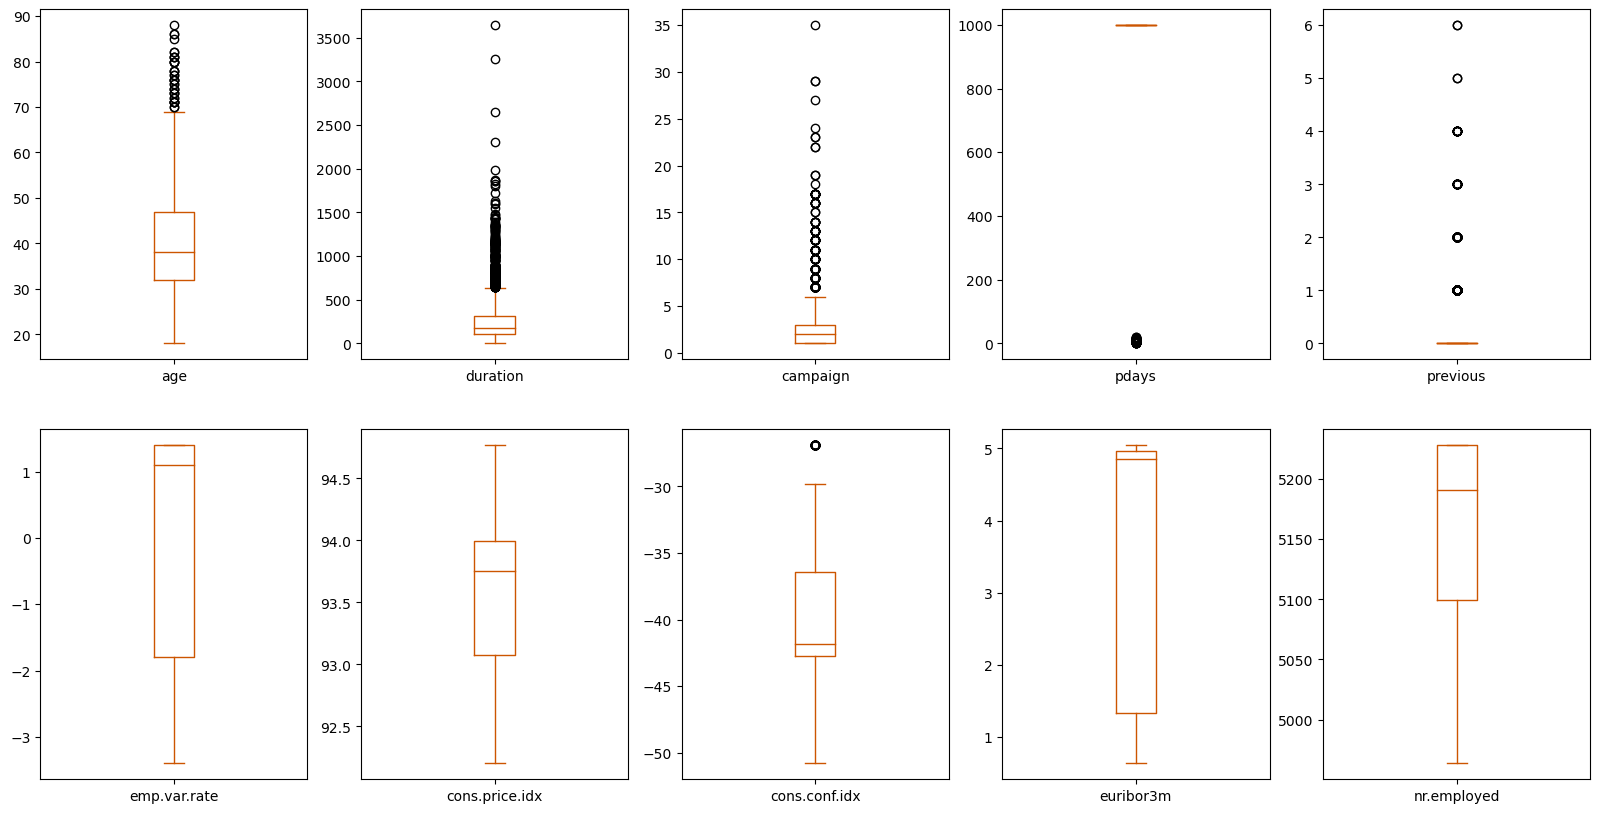

In [24]:
data.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#cc5500')
plt.show()


Through this Plot we can see there are 3 columns having outliers i.e.. 'Age', 'duration' and 'Campaign'. So, we will remove these outliers using Interquantile Range.

In [25]:
column = data[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

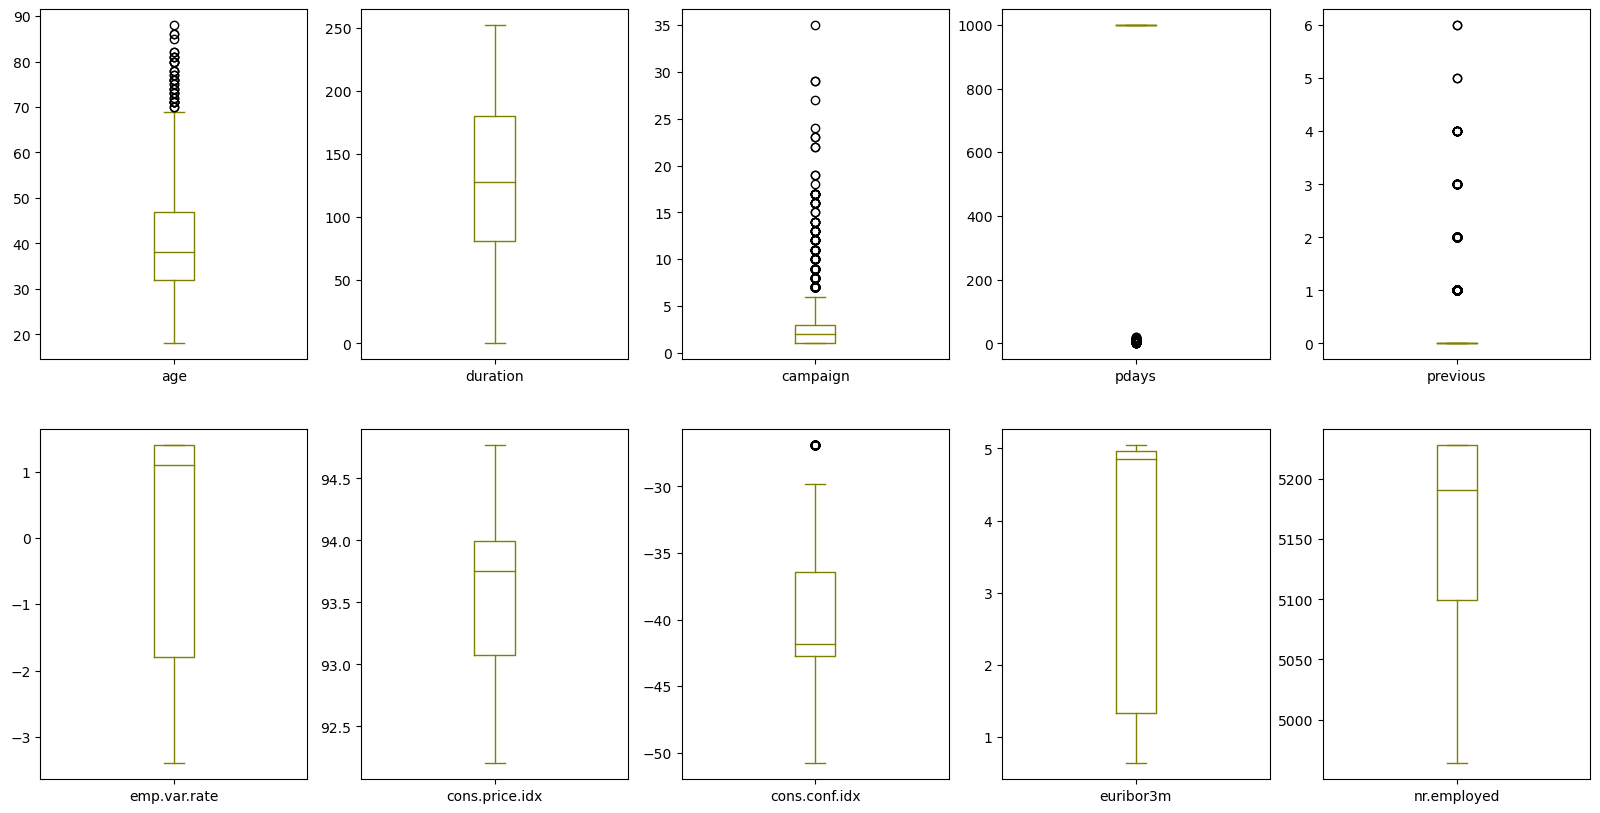

In [26]:
data.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

# Feature Selection using Correlation

In [30]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [31]:
data1 = data.copy()
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [32]:
data1.drop(high_corr_cols,inplace=True,axis=1)
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [33]:
data1.shape

(4119, 18)

Now, the dataset is having 4119 rows and 18 columns

# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data_encoded = data1.apply(lb.fit_transform)
data_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,250,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,250,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,250,0,20,0,1,13,17,0


# Checking for target variable

In [35]:
data_encoded['deposit'].value_counts()

deposit
0    3668
1     451
Name: count, dtype: int64

# Selecting Independent and Dependent Variables

In [36]:
x = data_encoded.drop('deposit',axis=1)
y = data_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Splitting the dataset into Train and Test datasets

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
print(4119*0.25)

1029.75


In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


# Creating a function to compute Confusion Matrix, Classification Report and to generate training and testing scores

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [41]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [44]:
mscore(dt)

Training Score 0.9148591777274199
Testing Score 0.8990291262135922


In [45]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 0 0]


In [46]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8990291262135922
Confusion Matrix
 [[905  25]
 [ 79  21]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       930
           1       0.46      0.21      0.29       100

    accuracy                           0.90      1030
   macro avg       0.69      0.59      0.62      1030
weighted avg       0.87      0.90      0.88      1030



## Plot Decision Tree

In [47]:
from sklearn.tree import plot_tree

In [48]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


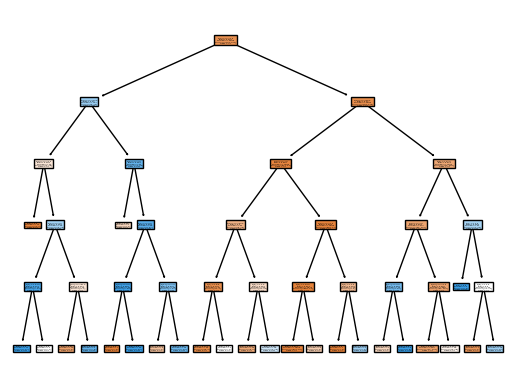

In [50]:
plot_tree(dt,feature_names=None,class_names=cn,filled=True)
plt.show()

# Decision Tree 2 (using entropy criteria) for visualization

In [51]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [52]:
mscore(dt1)

Training Score 0.9080608611201036
Testing Score 0.9048543689320389


In [53]:
ypred_dt1 = dt1.predict(x_test)

In [54]:
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9048543689320389
Confusion Matrix
 [[915  15]
 [ 83  17]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.53      0.17      0.26       100

    accuracy                           0.90      1030
   macro avg       0.72      0.58      0.60      1030
weighted avg       0.88      0.90      0.88      1030



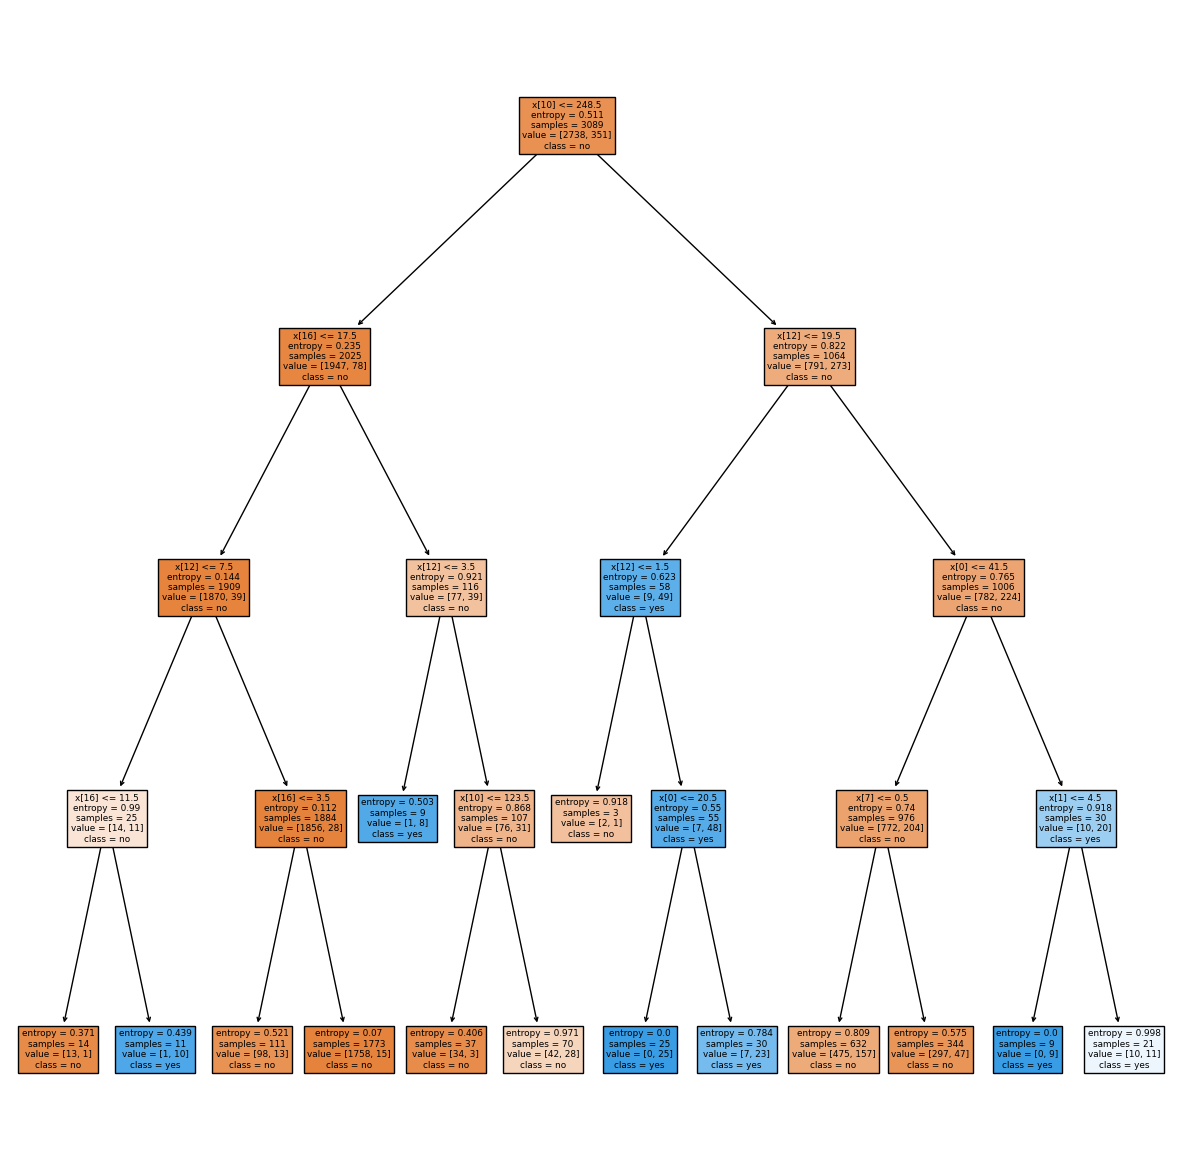

In [56]:
plt.figure(figsize=(15,15))
plot_tree(dt1,feature_names=None,class_names=cn,filled=True)
plt.show()